<H1 style = "Color : Blue"> Simple Linear Regression </H1>

<H3 style = "color : brown"> Step 1 : Reading and Understanding a Data</H3>

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

In [3]:
advertising = pd.read_csv('advertising.csv')
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
advertising.shape

(200, 4)

In [5]:
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


<H3 style = "color : brown"> Step 2 : Visualize the Data</H3>

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

[]

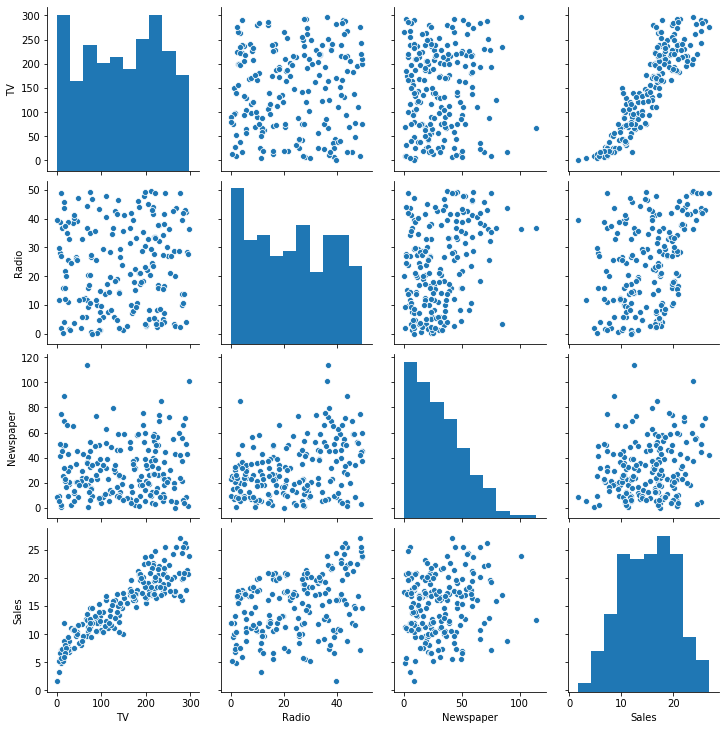

In [8]:
sns.pairplot(data = advertising)
plt.plot()

[]

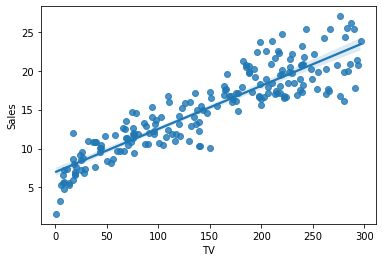

In [9]:
sns.regplot(x = 'TV', y = 'Sales',data = advertising)
plt.plot()

> As Spend on TV Advertising increases Sales also Increases

[]

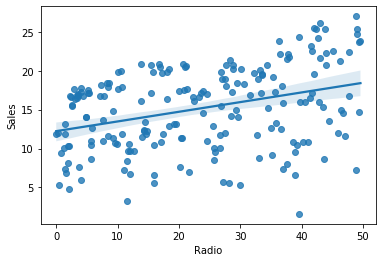

In [10]:
sns.regplot(x = 'Radio', y = 'Sales',data = advertising)
plt.plot()

> there is a positive trend but not strong as Sales with TV

[]

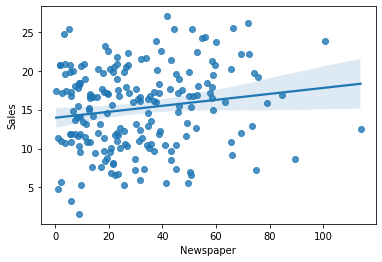

In [11]:
sns.regplot(x = 'Newspaper', y = 'Sales',data = advertising)
plt.plot()

> very weak trend compare to TV and Radio

[]

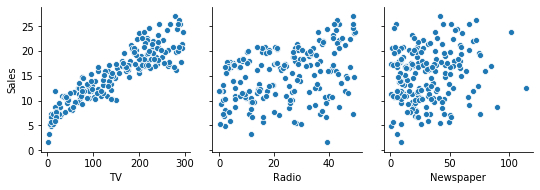

In [12]:
sns.pairplot(advertising, x_vars= ['TV','Radio','Newspaper'], y_vars= 'Sales')
plt.plot()

In [13]:
advertising.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


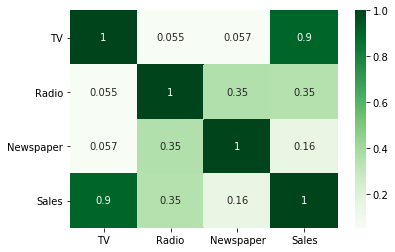

In [14]:
sns.heatmap(advertising.corr(),annot=True,cmap='Greens')

---
<H2 style = 'color : brown'> Step 3: Performing Simple Linear Regression</H2>

Equation of linear regression<br>
$y = c + m_1x_1 + m_2x_2 + ... + m_nx_n$

-  $y$ is the response
-  $c$ is the intercept
-  $m_1$ is the coefficient for the first feature
-  $m_n$ is the coefficient for the nth feature<br>

In our case:

$y = c + m_1 \times TV$

The $m$ values are called the model **coefficients** or **model parameters**.

---

In [15]:
import statsmodels
import statsmodels.api as sm

In [16]:
import sklearn

<H3 style = 'color : orange'> Broad Framework of Model Building:</H3>
<B>
    
    - Create X and Y
    - Create Train and Test Datasets
    - Train Model on Training Dataset
    - Evaluate the Model - Test Dataset
</B>

<H3 style = 'color : brown'> Step 1. Read Data : Create X and Y</H3>

In [17]:
#1. Read Data : Create X and Y

X = advertising['TV']
Y = advertising['Sales']

<H3 style = 'color : brown'> Step 2 : Train-Test Split</H3>

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X,Y,train_size = 0.7, test_size = 0.3,random_state = 100)

> We keep 70% of the data in the training dataset and the rest in the test dataset. The random_state argument ensures that the same training set is selected repeatedly, and the results that you get can be reproduced. 

In [20]:
X_Train.head()

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

In [21]:
Y_Train.head()

74     17.0
3      16.5
185    22.6
26     15.0
90     14.0
Name: Sales, dtype: float64

<H3 style = 'color : brown'> Step 3 : Train a Module in Training DataSet</H3>

<b> Simple Linear Regression Equation : Sales{Response Variable} = c{Intercept} + m1{Coefficient corelation}.TV

In [22]:
X_Train.head()

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

<B> Stats Module will not have intercept term C, in most of the module we may need so need to add Manually

In [23]:
X_Train_sm = sm.add_constant(X_Train)
X_Train_sm.head()

,const,TV
74,1.0,213.4
3,1.0,151.5
185,1.0,205.0
26,1.0,142.9
90,1.0,134.3


<b> Simple Linear Regression equation with constant added :  Sales = c.const + m1.TV

In [24]:
lr_obj = sm.OLS(Y_Train,X_Train_sm)

<b>Training will actually happen after fit() is called.
    
what does Training means Model/Algo has found optimum Values of Coefficent and intercept term

In [25]:
lr = lr_obj.fit()

In [26]:
lr.params

const    6.948683
TV       0.054546
dtype: float64

In [27]:
#Sales = 6.948 * Const + 0.054*TV

<b> only StatsModel gives detail Summary Scikit Learn dont give detail Summary

In [28]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Wed, 06 Jul 2022   Prob (F-statistic):           1.52e-52
Time:                        22:16:06   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.0

<b>We Notice :<i> 

    - 0.05 is a P standard value, so both TV and Const have P Value < 0.05. what it means is relationship between Sales and Marketing happening on TV is not just by chance, there is really statistical relation between them. same is relation with Constant
    - R-Square Value is 81% means 81% of Sales can be explain by the amount spend in TV Advertisement.
    - Prob (F-Statistic) says coz it value is tiny Model fit is statiscally significant. it also state explain variance given by Rsquared value is not by chance


In [29]:
#Prediction

Y_Train_pred = lr.predict(X_Train_sm)
Y_Train_pred.head()

74     18.588747
3      15.212365
185    18.130563
26     14.743271
90     14.274178
dtype: float64

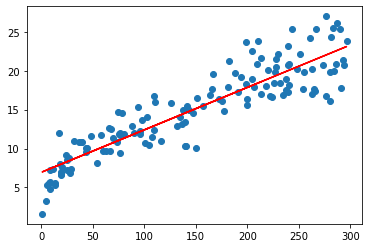

In [30]:
plt.scatter(X_Train,Y_Train)
plt.plot(X_Train,Y_Train_pred,'r')

<H3 style = 'color : brown'> Step 4 : Residual / Error Term Analysis</H3>

to validate assumptions of the model, and hence relaibility of inference


In [31]:
res = Y_Train - Y_Train_pred

res.head()

74    -1.588747
3      1.287635
185    4.469437
26     0.256729
90    -0.274178
dtype: float64

<B> Distribution of Residual / Error Terms
    

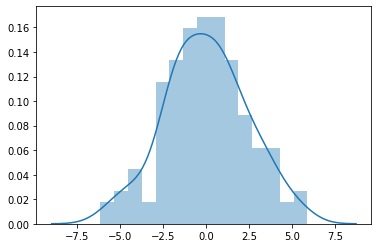

In [32]:
fig = plt.figure()
sns.distplot(res,bins = 15)

> <B>Seems Normally Distributed as it shows bell curve.

> <b>center is at 0 so residual are following Mean of 0

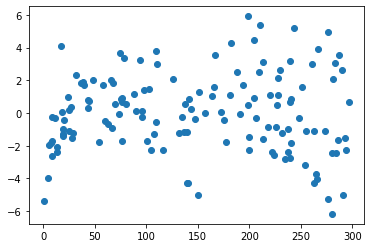

In [33]:
# to check if pattern Exist or not
plt.scatter(X_Train,res)

> <b> Dont see any Pattern for Residual, so its a Normally distributed

<H3 style = 'color : brown'> Step 5 : Prediction on the Test Set</H3>

In [34]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [35]:
X_Test_sm = sm.add_constant(X_Test)

In [36]:
X_Test_sm.head()

,const,TV
126,1.0,7.8
104,1.0,238.2
99,1.0,135.2
92,1.0,217.7
111,1.0,241.7


In [37]:
Y_Pred = lr.predict(X_Test_sm)
Y_Pred.head()

126     7.374140
104    19.941482
99     14.323269
92     18.823294
111    20.132392
dtype: float64

<b> Looking for Root Mean Square Error (RMSE)
    

In [38]:
np.sqrt(mean_squared_error(Y_Test,Y_Pred))

2.019296008966233

<b> Checking the R-Squared on the test dataset

In [39]:
r2_score(Y_Test,Y_Pred)

0.7921031601245658

<b> Visualizing the Fit on Test Dataset

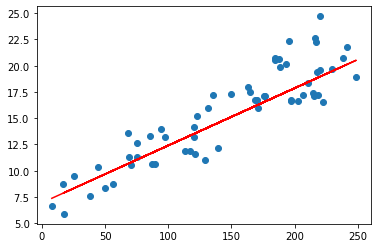

In [40]:
plt.scatter(X_Test,Y_Test)
plt.plot(X_Test,Y_Pred,'r')

<H2 style = "color : blue"> Linear Regression using linear_model in sklearn</H2>

In [41]:
from sklearn.linear_model import LinearRegression

In [42]:
lm = LinearRegression()

In [43]:
# lm.fit(X_Train,Y_Train) : it throws error coz

X_Train.shape 

# it is series Datatype, but lm object is expecting dataobject of shape (140,1)
# so we need to change the shape.

(140,)

In [44]:
X_Train_lm = X_Train.values.reshape(-1,1) #-1 denote please ignore the rows in dataset
X_Train_lm.shape

(140, 1)

In [45]:
X_Test_lm = X_Test.values.reshape(-1,1) #-1 denote please ignore the rows in dataset
X_Test_lm.shape

(60, 1)

In [46]:
lm.fit(X_Train_lm,Y_Train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [47]:
lm.coef_

array([0.05454575])

In [48]:
lm.intercept_

6.948683200001357

The equationwe get is the same as what we got before!

$ Sales = 6.948 + 0.054* TV $

Sklearn linear model is useful as it is compatible with a lot of sklearn utilites (cross validation, grid search etc.)

In [49]:
Y_Train_Pred = lm.predict(X_Train_lm)
Y_Test_Pred = lm.predict(X_Test_lm)

In [50]:
print(r2_score(Y_Train, Y_Train_Pred))
print(r2_score(Y_Test, Y_Test_Pred))


0.8157933136480389
0.7921031601245662
